Units used: GeV for masses, s for time, cm for distances

In [17]:
import os
import glob
import importlib

import matplotlib as mlib
import matplotlib.pyplot as plt

# plt.rcParams["text.usetex"] = True
# plt.rcParams["text.latex.preamble"] = r"\usepackage{slashed}"

import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
os.system('git -C /home/stasya/prj/alps-running/TdAlps-Internal/ fetch;\
git -C /home/stasya/prj/alps-running/TdAlps-Internal/ status')
import TdAlps
from collections import OrderedDict

import scipy
import scipy.integrate as integrate
import scipy.optimize as optimize

import csv

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [18]:
#Plotting settings

font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [19]:
def importNotebook(name):
    
    currentDir=os.getcwd()
    notebookDir=os.path.dirname(name)
    os.chdir(notebookDir)
    os.system('git fetch; git status')
    notebookName=os.path.basename(name).split('.')[0]
    module = importlib.import_module(f"ipynb.fs.full.{notebookName}")
    
    os.chdir(currentDir)
    
    globals().update(vars(module))

In [20]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_base.ipynb")

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ALPs_BRs-check.ipynb
	ALPs_wip-Nastya.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [21]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_BRs.ipynb")

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	ALPs_BRs-check.ipynb
	ALPs_wip-Nastya.ipynb

nothing added to commit but untracked files present (use "git add" to track)


### mass-coupling grid

In [22]:
#masslist= [0.05, 0.05, 0.1, 0.2, 0.3, 0.5, 1., 2., 4.]
masslist=np.sort(np.append(np.logspace(-2, 0, 25),[0.09, 0.101, 0.43, 0.47,0.55,\
                                                   0.95, 1, 1.5, 2, 2.5, 3, 3.2, 3.5, 4,\
                                                   0.0935, 0.095, 0.63, 0.65]))
masslistShort=np.logspace(-2,np.log(2.1), 40)
particleCodes=[*range(0,7,1)]

In [23]:
masslistShort

array([0.01      , 0.01175726, 0.01382331, 0.01625243, 0.0191084 ,
       0.02246624, 0.02641414, 0.03105579, 0.0365131 , 0.0429294 ,
       0.0504732 , 0.05934265, 0.06977069, 0.08203121, 0.09644622,
       0.11339432, 0.13332063, 0.15674852, 0.1842933 , 0.2166784 ,
       0.25475441, 0.29952136, 0.35215502, 0.41403778, 0.48679494,
       0.57233742, 0.67291193, 0.79115999, 0.93018729, 1.09364529,
       1.28582709, 1.51178022, 1.77743916, 2.08978126, 2.45700995,
       2.88877024, 3.396402  , 3.9932378 , 4.69495311, 5.51997797])

In [24]:
couplingList=np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))
couplingListShort=np.logspace(np.log(8*10**-4), np.log(1.7), 25)
couplingListExtended=np.sort(np.append(np.logspace(-6, 7, 40),np.logspace(-1, 2, 20)))

In [25]:
couplingListShort

array([7.39777588e-08, 1.54287757e-07, 3.21782010e-07, 6.71107442e-07,
       1.39965935e-06, 2.91912468e-06, 6.08811630e-06, 1.26973542e-05,
       2.64815579e-05, 5.52298451e-05, 1.15187173e-04, 2.40233968e-04,
       5.01031130e-04, 1.04494879e-03, 2.17934156e-03, 4.54522719e-03,
       9.47951003e-03, 1.97704332e-02, 4.12331468e-02, 8.59957079e-02,
       1.79352350e-01, 3.74056638e-01, 7.80131225e-01, 1.62703897e+00,
       3.39334683e+00])

In [26]:
BelleIIparams={
    'gammaBoostB': 1.03029,
    'RCDC': 60, #cm
    'thetaCDCMin': np.deg2rad(17),
    'thetaCDCMax': np.deg2rad(150),
    'dres': 0.9,
    'NBBelleII': 5*10**10
}

In [27]:
def f(Lambda):
    return Lambda/(4 * np.pi)

In [28]:
constants={
    'InvGeVtocm': 1/(5.06 * 10**(13))
}

In [29]:
sm['tauB+'] = 1.638*10**(-12)
sm['ctauB+']= 3 * 10**10 * 1.638*10**(-12)

## based on https://github.com/rrschaefer/alps (formulas taken from 2012.12272 and 1708.00443)

### Alps running implemented in https://github.com/TdAlps

### ALP and B-> Ka decay rates

In [30]:
def BrBtoKaplus(ma, cbs, Lambda):
    return (np.pi/4)*abs(cbs)**2/(Lambda**2) * abs(formFactorFzeroBplus(ma**2))**2 \
            * (sm['mB+']**2-sm['mK+']**2)**2/sm['mB+']**3 * np.sqrt(sm['mB+']**4+sm['mK+']**4+ma**4\
            -2*(sm['mB+']**2 * sm['mK+']**2 + sm['mK+']**2 * ma**2 + ma**2 * sm['mB+']**2))\
            /sm['hbar']*sm['tauB+']

### ALP branching ratios

### decays under consideration encoded as
 - 0: e 
 - 1: mu
 - 2: tau
 - 3: charm
 - 4: bottom
 - 5: photon
 - 6: hadron
 - 7: 3 pions

In [31]:
def brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,lscsPassed=None):
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = -np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = -np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = -np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB

        brs = [[],[],[],[],[],[],[],[],[]]
        
        if (lscsPassed is not None):
            lscs=lscsPassed
        else:
            if ma<1:
                mu = 1
            else:
                mu=ma
            lscs = TdAlps.RunRotateMatchRun(HC, Lambda, mu, 3)
        
#         print("mu= ",mu)
#         print("readCee= ",readCee(lscs),", readCmumu= ",readCmumu(lscs))
#         print([ma,readCee(lscs),sm['me'],Lambda])
#         print("Gamma_ll= ",Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        
        brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda))
        try:
            ctautau = readCtautau(lscs)
        except IndexError:
            ctautau = 0
        brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],Lambda))
        try:
            ccc = readCcc(lscs)
        except IndexError:
            ccc = 0
        brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],Lambda))
        try:
            cbb = readCbb(lscs)
        except IndexError:
            cbb = 0
        brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],Lambda))
        brs[5].append(Gammaatogamgam(ma,lscs,Lambda))
        brs[6].append(Gammaatohad(ma,lscs,Lambda))
        brs[7].append(Gammaato3pi000(ma,lscs,Lambda)+Gammaato3pi0pm(ma,lscs,Lambda))
        brs[8].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]\
                      +brs[6][-1]+brs[7][-1])
            

#         print("br[0][-1]= ",brs[0][-1])
        
        ctauAlp=constants['InvGeVtocm']/brs[8][-1]

        return [brs[finalStateCode][-1]/brs[8][-1],ctauAlp]

In [32]:
brALPtoOneFinalState(0.1,5,1,-1,-1,1,-1,0,0,0,4*np.pi*10**3,lscsPassed=None)

[0.030776453750934244, 7613416.06371888]

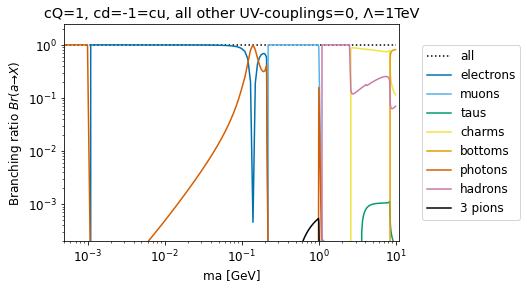

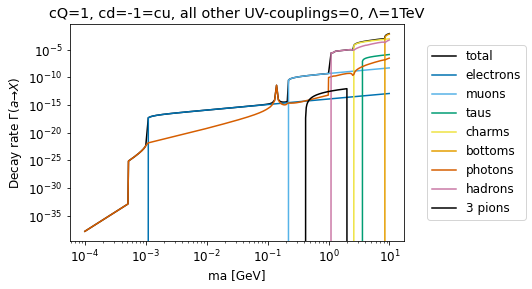

In [17]:
brsALP(1,1,1,0,0,0,0,0,"cQ=1, cd=-1=cu, all other UV-couplings=0, \u039B=1TeV",1000)
brsALP(1,1,1,0,0,0,0,0,"cQ=1, cd=-1=cu, all other UV-couplings=0, \u039B=1TeV",1000,br=False)

## Integral over detector

In [33]:
def gammaBeta(gammaParent,mParent,ma):
    return np.sqrt(gammaParent**2 * (sm['mB+']**2-sm['mK+']**2+ma**2)**2/(4*sm['mB+']**2*ma**2)-1)
    
def gammaBetaAlp(ma):
    return gammaBeta(BelleIIparams['gammaBoostB'],sm['mB+'],ma)

In [34]:
def thetaMinBoost(thetaMin,r,ctau,gammaBeta):
    return np.arctan(r/(r/np.tan(thetaMin) - gammaBeta * ctau))

def thetaMaxBoost(thetaMin,r,ctau,gammaBeta):
    return np.pi+np.arctan(-r/(-r/np.tan(thetaMin) + gammaBeta * ctau))

def geomInt(thetaMin,thetaMax,dmin,dmax,ctau,gammaBeta):
    return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
            * (np.exp(-dmin/(np.sin(theta) * gammaBeta * ctau)) * (dmin**2 + 2 * gammaBeta * ctau * np.sin(theta) \
            * (dmin + gammaBeta * ctau * np.sin(theta)))\
            - np.exp(-dmax/(np.sin(theta) * gammaBeta * ctau)) * (dmax**2 + 2 * gammaBeta * ctau * np.sin(theta) \
            * (dmax + gammaBeta * ctau * np.sin(theta))))\
            , thetaMin, thetaMax)[0]
    
def geomIntBelleIICDC(thetaMin,thetaMax,dmin,dmax,ctau,gammaBeta):
    return np.heaviside(np.real(BelleIIparams['RCDC']/np.tan(thetaMin)-BelleIIparams['gammaBoostB'] * sm['ctauB+']),1)\
            * geomInt(thetaMin,thetaMax,dmin,dmax,ctau,gammaBeta)
                                                

# Number of signal events

In [35]:
BelleIIparams={
    'gammaBoostB': 1.03029,
    'RCDC': 60, #cm
    'thetaCDCMin': np.deg2rad(17),
    'thetaCDCMax': np.deg2rad(150),
    'dres': 0.9,
    'NBBelleII': 5*10**10
}

In [36]:
def nsignalBelleII(ma,finalStateCode,cff,cGG,cWW,cBB,Lambda):
    with HiddenPrints():
#         print(cff)
        cQ = cu = cd = cL = ce = cff

        coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
        cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])
#         print("cbs= ",cbs)

        
#     print("BR(B-> K+ a)= ",BrBtoKaplus(ma, cbs, Lambda))    
    
#     #rewrite brALPtoOneFinalState such that last agr can be not a None 
#     print("BR(a->final)= ",brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0])
    
#     print([thetaMinBoost(BelleIIparams['thetaCDCMin'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),thetaMaxBoost(BelleIIparams['thetaCDCMax'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),BelleIIparams['dres'],BelleIIparams['RCDC']\
#     ,brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[1],gammaBetaAlp(ma)])
    
#     print(geomIntBelleIICDC(thetaMinBoost(BelleIIparams['thetaCDCMin'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),thetaMaxBoost(BelleIIparams['thetaCDCMax'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),BelleIIparams['dres'],BelleIIparams['RCDC']\
#     ,brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[1],gammaBetaAlp(ma)))
    
        return BelleIIparams['NBBelleII'] * BrBtoKaplus(ma, cbs, Lambda) \
        * brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]\
        * geomIntBelleIICDC(thetaMinBoost(BelleIIparams['thetaCDCMin'],BelleIIparams['RCDC'],sm['ctauB+']\
        ,gammaBetaAlp(ma)),thetaMaxBoost(BelleIIparams['thetaCDCMax'],BelleIIparams['RCDC'],sm['ctauB+']\
        ,gammaBetaAlp(ma)),BelleIIparams['dres'],BelleIIparams['RCDC']\
        ,brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[1],gammaBetaAlp(ma))

In [37]:
nsignalBelleII(0.01,5,10**-6,0,0,0,4*np.pi*10**3)

/tmp/ipykernel_543882/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \


-6.338924326935823e-22

In [38]:

# def nsignalAt95CLBelleIIAllcEqual(cff,ma,finalStateCode,Lambda,nOfEventsAt95CL):
#     cQ=cL=cWW=cBB=cff
#     ce=cd=cu=-cff
#     cGG=0
#     return nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda)-nOfEventsAt95CL

def nsignalAt95CLBelleIIcff(cff,ma,finalStateCode,Lambda,nOfEventsAt95CL):
    cGG=cWW=cBB=0
#     cQ=cL=cff
#     ce=cd=cu=-cff
    return nsignalBelleII(ma,finalStateCode,cff,cGG,cWW,cBB,Lambda)-nOfEventsAt95CL


# def nsignalAt95CLBelleIIcWW(cWW,ma,finalStateCode,Lambda,nOfEventsAt95CL):
#     cQ=cL=cu=cd=ce=cGG=cBB=0
#     res = []
#     for i in np.asarray(cWW):
#         res_i = nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,i,cBB,Lambda)-nOfEventsAt95CL
#         res.append(res_i)
#     return np.array(res)

def nsignalAt95CLBelleIIcWW(cWW,ma,finalStateCode,Lambda,nOfEventsAt95CL):
#     cQ=cL=cu=cd=ce=cGG=cBB=0
    cGG=cBB=0
    cff=0
    return nsignalBelleII(ma,finalStateCode,cff,cGG,cWW,cBB,Lambda)-nOfEventsAt95CL

In [25]:
nsignalAt95CLBelleIIcff(0.0001,0.01,1,4*np.pi*10**3,3)

/tmp/ipykernel_9516/2346480957.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \


-3.0

### decays under consideration encoded as
 - 0: e 
 - 1: mu
 - 2: tau
 - 3: charm
 - 4: bottom
 - 5: photon
 - 6: hadron
 - 7: 3 pions

In [39]:
def visibleBoundBelleIIcffEqcWWEqcBB(ma,finalStateCode,Lambda,nOfEventsAt95CL):
    nsignalAt95CLBelleIIAllcEqualEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIAllcEqual(\
                    coupling,ma,finalStateCode,Lambda,nOfEventsAt95CL)] for coupling in couplingList))
    
#     print([nsignalAt95CLBelleIIAllcEqual(couplingList[0],ma,finalStateCode,Lambda,nOfEventsAt95CL),\
#           nsignalAt95CLBelleIIAllcEqual(nsignalAt95CLBelleIIAllcEqualEstimate[\
#         np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0),0],ma,finalStateCode,Lambda,nOfEventsAt95CL)])
    
    if (np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0)==0):
        root1=root2=np.nan
    else:
        root1=optimize.brentq(nsignalAt95CLBelleIIAllcEqual, couplingList[0],\
            nsignalAt95CLBelleIIAllcEqualEstimate[np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0),0],\
                          args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))

        root2=optimize.brentq(nsignalAt95CLBelleIIAllcEqual,\
            nsignalAt95CLBelleIIAllcEqualEstimate[np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0),0],\
                              couplingList[-1], args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
    return [root1,root2]

def visibleBoundBelleIIcff(ma,finalStateCode,Lambda,nOfEventsAt95CL):
    nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
                                                Lambda,nOfEventsAt95CL)] for coupling in couplingListExtended))
#     print(nsignalAt95CLBelleIIcffEstimate)
    if (np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0)==0):
        root1=root2=np.nan
    else:
        root1=optimize.brentq(nsignalAt95CLBelleIIcff, couplingListExtended[0],\
            nsignalAt95CLBelleIIcffEstimate[np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0),0],\
                          args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
#         print("argmax>0= ",nsignalAt95CLBelleIIcffEstimate[np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0),0])
#         print(root1)

        root2=optimize.brentq(nsignalAt95CLBelleIIcff,\
            nsignalAt95CLBelleIIcffEstimate[np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0),0],\
                              couplingListExtended[-1], args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
#         print(root2)
    return [root1,root2]

def visibleBoundBelleIIcWW(ma,finalStateCode,Lambda,nOfEventsAt95CL):
    nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
                                                Lambda,nOfEventsAt95CL)] for coupling in couplingListExtended))
#     print(nsignalAt95CLBelleIIcWWEstimate)
    if (np.argmax(nsignalAt95CLBelleIIcWWEstimate[:,1]>0)==0):
        root1=root2=np.nan
    else:
        root1=optimize.brentq(nsignalAt95CLBelleIIcWW, couplingListExtended[0],\
            nsignalAt95CLBelleIIcWWEstimate[np.argmax(nsignalAt95CLBelleIIcWWEstimate[:,1]>0),0],\
                          args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))

        root2=optimize.brentq(nsignalAt95CLBelleIIcWW,\
            nsignalAt95CLBelleIIcWWEstimate[np.argmax(nsignalAt95CLBelleIIcWWEstimate[:,1]>0),0],\
                              couplingListExtended[-1], args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
    return [root1,root2]
    

In [40]:
visibleBoundBelleIIcWW(0.1,5,4*np.pi*10**3,3)

/tmp/ipykernel_543882/4283915912.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWa

[3.395079215435809, 742.9516089995062]

In [28]:
visibleBoundBelleIIcWW(1,5,4*np.pi*10**3,3)

/tmp/ipykernel_9516/4283915912.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
/tmp/ipykernel_9516/2346480957.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
/tmp/ipykernel_9516/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subran

[0.06929426415559684, 4.859429850836381]

In [29]:
visibleBoundBelleIIcff(0.1,5,4*np.pi*10**3,3)

/tmp/ipykernel_9516/4283915912.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
/tmp/ipykernel_9516/2346480957.py:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
/tmp/ipykernel_9516/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subran

[0.12439778996785963, 60.88813903478032]

### mapping bounds over masses and final states

In [30]:
# listVisibleBoundBelleIIcffEqcWWEqcBB=[]
# for mass in masslist:
#     listForFixedMass=[]
#     for particle in particleCodes:
#         listForFixedMass.append(visibleBoundBelleIIcffEqcWWEqcBB(mass,particle,4*np.pi*10**3,3))
#     listVisibleBoundBelleIIcffEqcWWEqcBB.append(listForFixedMass)
# arrayVisibleBoundBelleIIcffEqcWWEqcBB=np.array(listVisibleBoundBelleIIcffEqcWWEqcBB)

In [41]:
listVisibleBoundBelleIIcff=[]
for mass in masslist:
    listForFixedMass=[]
    for particle in particleCodes:
        listForFixedMass.append(visibleBoundBelleIIcff(mass,particle,4*np.pi*10**3,3))
    listVisibleBoundBelleIIcff.append(listForFixedMass)
arrayVisibleBoundBelleIIcff=np.array(listVisibleBoundBelleIIcff)

/tmp/ipykernel_543882/4283915912.py:22: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWa

In [42]:
masslist

array([0.01      , 0.01211528, 0.01467799, 0.01778279, 0.02154435,
       0.02610157, 0.03162278, 0.03831187, 0.04641589, 0.05623413,
       0.06812921, 0.08254042, 0.09      , 0.0935    , 0.095     ,
       0.1       , 0.101     , 0.12115277, 0.14677993, 0.17782794,
       0.21544347, 0.26101572, 0.31622777, 0.38311868, 0.43      ,
       0.46415888, 0.47      , 0.55      , 0.56234133, 0.63      ,
       0.65      , 0.68129207, 0.82540419, 0.95      , 1.        ,
       1.        , 1.5       , 2.        , 2.5       , 3.        ,
       3.2       , 3.5       , 4.        ])

In [43]:
visibleBoundBelleIIcWW(0.01,5,4*np.pi*10**3,3)

/tmp/ipykernel_543882/4283915912.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWa

[106.7683775099319, 87372.2334310382]

In [44]:
listVisibleBoundBelleIIcWW=[]
for mass in masslist:
    listForFixedMass=[]
    for particle in particleCodes:
#         print(mass,particle)
        listForFixedMass.append(visibleBoundBelleIIcWW(mass,particle,4*np.pi*10**3,3))
    listVisibleBoundBelleIIcWW.append(listForFixedMass)
arrayVisibleBoundBelleIIcWW=np.array(listVisibleBoundBelleIIcWW)

/tmp/ipykernel_543882/4283915912.py:41: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
/tmp/ipykernel_543882/2346480957.py:8: IntegrationWa

In [45]:
arrayVisibleBoundBelleIIcWW

array([[[2.99921755e+02, 7.58145716e+04],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [1.06768378e+02, 8.73722334e+04],
        [           nan,            nan]],

       [[2.36306324e+02, 5.04353126e+04],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [8.00738013e+01, 5.88364135e+04],
        [           nan,            nan]],

       [[1.86239046e+02, 3.35093282e+04],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [6.00536558e+01, 3.96162433e+04],
        [           nan,            nan]],

       [[1.46802159e+02, 2.22417640e+04],
        [           nan,            nan],
        [           nan,    

In [46]:
listVisibleBoundBelleIIcff

[[[0.4524646647385215, 690.5211035801674],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [1.2431891509089161, 613.1552866092691],
  [nan, nan]],
 [[0.3915666655734209, 566.5802471211472],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [1.0292106239034344, 505.37904497036106],
  [nan, nan]],
 [[0.3389289978565621, 464.97368633411946],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.8516288797029858, 416.6879770293011],
  [nan, nan]],
 [[0.2934016026595002, 381.6209628709016],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.7043294112381535, 343.6387477725679],
  [nan, nan]],
 [[0.25400567783362177, 313.21082135207115],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.5822170347953357, 283.4334222048431],
  [nan, nan]],
 [[0.21990340656374674, 257.0452028726041],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.48103742139080313, 233.78833608285416],
  [nan, nan]],
 [[0.1903747365208342, 210.91944393583213],
  [nan,

### saving bounds to files

In [47]:
# np.save('output/visibleBoundBelleIIcffEqcWWEqcBB',arrayVisibleBoundBelleIIcffEqcWWEqcBB)
np.save('output/visibleBoundBelleIIcff_new',arrayVisibleBoundBelleIIcff)
np.save('output/visibleBoundBelleIIcWW_new',arrayVisibleBoundBelleIIcWW)

### importing bounds 

In [38]:
# readArrayVisibleBoundBelleIIcffEqcWWEqcBB = np.load('output/visibleBoundBelleIIcffEqcWWEqcBB.npy')
readArrayVisibleBoundBelleIIcff = np.load('output/visibleBoundBelleIIcff.npy')
readArrayVisibleBoundBelleIIcWW = np.load('output/visibleBoundBelleIIcWW.npy')

In [39]:
BaBarBounds=genfromtxt('../ruth/BaBarBounds_readable.txt', delimiter='\t')
BaBarBoundsOld=genfromtxt('../ruth/BaBarBounds_readable_old.txt', delimiter='\t')

In [40]:
BellIIInvBounds05ab=genfromtxt('../ruth/BelleIIInvBounds_readable_0.5ab.txt', delimiter='\t')
BellIIInvBounds50ab=genfromtxt('../ruth/BelleIIInvBounds_readable_50ab.txt', delimiter='\t')

In [41]:
LHCbBoundscff=genfromtxt('output/LHCb_cff.dat', delimiter='\t')
LHCbBoundscWW=genfromtxt('output/LHCb_cWW.dat', delimiter='\t')

In [42]:
Na62Boundscff=genfromtxt('output/Na62_cff.dat', delimiter='\t')
Na62BoundscWW=genfromtxt('output/Na62_cWW.dat', delimiter='\t')

In [43]:
LHCbBoundscff

array([[0.21291332, 0.00514175],
       [0.26189913, 0.00391375],
       [0.31572737, 0.00131377],
       [0.38839475, 0.00126971],
       [0.42737035, 0.00135936],
       [0.46650696, 0.00126971],
       [0.55588211, 0.00126971],
       [0.55588211, 0.00126971],
       [0.64162201, 0.00140653],
       [0.65713652, 0.00135936],
       [0.68656628, 0.00131377],
       [0.82793711, 0.00131377],
       [0.94799941, 0.00118597],
       [1.0063745 , 0.00118597],
       [1.00321179, 0.02154435],
       [0.94911905, 0.07109709],
       [0.82557876, 0.06640828],
       [0.69008699, 0.06640828],
       [0.64234189, 0.0687127 ],
       [0.569979  , 0.06640828],
       [0.46518271, 0.06640828],
       [0.43127233, 0.06640828],
       [0.38888407, 0.1       ],
       [0.31993215, 0.11077569],
       [0.26009436, 0.15058364],
       [0.21657595, 0.25118864]])

In [44]:
masslist.shape

(43,)

In [45]:
masslistShort.shape

(40,)

In [46]:
BaBarBounds

array([[5.00000000e-03, 5.25358760e-02, 1.60129388e+01],
       [5.00000000e-02, 5.24753865e-02, 1.79357220e+01],
       [7.00000000e-02, 5.24488956e-02, 1.56206887e+02],
       [1.00000000e-01, 5.24130537e-02, 1.74782889e+02],
       [2.00000000e-01, 5.22921954e-02, 1.72429650e+02],
       [2.50000000e-01, 5.21302367e-01, 1.59001933e+02],
       [3.00000000e-01, 5.67631473e-01, 1.73094285e+02],
       [5.00000000e-01, 5.50096652e-01, 1.67767850e+02],
       [1.00000000e+00, 4.89925030e-01, 1.49434845e+02],
       [2.00000000e+00, 4.32908460e-01, 1.32045144e+02],
       [3.00000000e+00, 2.53996513e-01, 7.74667964e+01],
       [4.00000000e+00, 2.99451197e-01, 9.12868314e+01]])

In [47]:
BaBarBoundsOld

array([[5.00000000e-03, 7.16307062e-03, 7.20750867e-03, 1.16208117e+00],
       [5.00000000e-02, 7.15594174e-03, 7.19981710e-03, 1.27128077e+00],
       [7.00000000e-02, 7.15532580e-03, 7.19774495e-03, 1.13224621e+01],
       [1.00000000e-01, 7.16272331e-03, 7.19904662e-03, 1.26878923e+01],
       [2.00000000e-01, 7.26282833e-03, 7.22141189e-03, 1.24999149e+01],
       [2.50000000e-01, 7.10783030e-02, 7.15192563e-02, 1.15250012e+01],
       [3.00000000e-01, 7.73951764e-02, 7.78753180e-02, 1.25482859e+01],
       [5.00000000e-01, 7.50043832e-02, 7.54696930e-02, 1.21610126e+01],
       [1.00000000e+00, 6.68002835e-02, 6.72146969e-02, 1.08319123e+01],
       [2.00000000e+00, 5.90267085e-02, 5.93928964e-02, 9.57232110e+00],
       [3.00000000e+00, 3.46333364e-02, 3.48481936e-02, 5.61803961e+00],
       [4.00000000e+00, 4.08366737e-02, 4.10900149e-02, 6.62389037e+00]])

In [48]:
testcombinedx=np.append(masslist,np.flip(masslist))
testcombined=np.append(readArrayVisibleBoundBelleIIcWW[:,0,0],np.flip(readArrayVisibleBoundBelleIIcWW[:,0,1]))

## Generate [ma, tau, c, BR(theory)] files

In [36]:
masslist

array([0.01      , 0.01211528, 0.01467799, 0.01778279, 0.02154435,
       0.02610157, 0.03162278, 0.03831187, 0.04641589, 0.05623413,
       0.06812921, 0.08254042, 0.09      , 0.0935    , 0.095     ,
       0.1       , 0.101     , 0.12115277, 0.14677993, 0.17782794,
       0.21544347, 0.26101572, 0.31622777, 0.38311868, 0.43      ,
       0.46415888, 0.47      , 0.55      , 0.56234133, 0.63      ,
       0.65      , 0.68129207, 0.82540419, 0.95      , 1.        ,
       1.        , 1.5       , 2.        , 2.5       , 3.        ,
       3.2       , 3.5       , 4.        ])

In [38]:
couplingList

array([1.00000000e-06, 3.35981829e-06, 1.12883789e-05, 3.79269019e-05,
       1.27427499e-04, 4.28133240e-04, 1.43844989e-03, 4.83293024e-03,
       1.62377674e-02, 5.45559478e-02, 1.00000000e-01, 1.43844989e-01,
       1.83298071e-01, 2.06913808e-01, 2.97635144e-01, 4.28133240e-01,
       6.15848211e-01, 6.15848211e-01, 8.85866790e-01, 1.27427499e+00,
       1.83298071e+00, 2.06913808e+00, 2.63665090e+00, 3.79269019e+00,
       5.45559478e+00, 6.95192796e+00, 7.84759970e+00, 1.12883789e+01,
       1.62377674e+01, 2.33572147e+01, 2.33572147e+01, 3.35981829e+01,
       4.83293024e+01, 6.95192796e+01, 7.84759970e+01, 1.00000000e+02,
       2.63665090e+02, 8.85866790e+02, 2.97635144e+03, 1.00000000e+04])

In [33]:
def generateLHCbFiles(mlist,clist,process,Lambda):
    
    with HiddenPrints():
    
        lhcbList=[['# m [GeV], tau [ps], c, BR_theo(B->K mu mu)\n']]

        for ma in mlist:
            for c in clist:

#                 if process in ['cff=cWW=cBB']:
#                     #print("1")
#                     cQ=cL=cWW=cBB=cff=c
#                     ce=cd=cu=-c
#                     cGG=0

                if process in ['cWW']:
                    #print("2")
                    cQ=cL=cu=cd=ce=cGG=cBB=cff=0
                    cWW=c


                if process in ['cff']:
                    #print("3")
                    cGG=cWW=cBB=0
                    cQ=cL=cff=c
                    ce=cd=cu=-c

                coefs=getLScoefficients(cff, cWW, cBB, Lambda, ma)
                cbs=getCbs(cff, cWW, cBB, Lambda, sm['mB+'])

                BR= BrBtoKaplus(ma, cbs, Lambda) \
                *brALPtoOneFinalState(ma,1,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]
                tau=ctaua(ma, cff, cWW, cBB, Lambda)/sm['c']*10**12

                lhcbList.append([ma,tau,c,BR])
        return lhcbList

In [34]:
# meshcffcWWcBB=generateLHCbFiles(masslistShort,couplingListShort,'cff=cWW=cBB',4*np.pi*10**3)

In [39]:
meshcWW=generateLHCbFiles(masslist,couplingList,'cWW',4*np.pi*10**3)
meshcff=generateLHCbFiles(masslist,couplingList,'cff',4*np.pi*10**3)

<ipython-input-16-8c939a5a82a1>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-16-8c939a5a82a1>:88: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-16-8c939a5a82a1>:101: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-16-8c939a5a82a1>:75: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


In [40]:
# with open("output/m-tau-c-BRBtoKmumu-cffcWWcBB.dat", "w", newline="") as f:
#     writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
#     writer.writerows(meshcffcWWcBB)
    
with open("output/m-tau-c-BRBtoKmumu-cWW.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcWW)
    
with open("output/m-tau-c-BRBtoKmumu-cff.dat", "w", newline="") as f:
    writer = csv.writer(f,delimiter=",", quoting = csv.QUOTE_NONE,escapechar=' ')
    writer.writerows(meshcff)

In [41]:
ctaua(0.9,5.010311e-04,0,0,4*np.pi*10**3)/sm['c']*10**12

no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/


<ipython-input-16-8c939a5a82a1>:101: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-16-8c939a5a82a1>:88: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-16-8c939a5a82a1>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


1468.2136323485731

In [61]:
ctaua(0.9,5.010311e-04,0,0,4*np.pi*10**3)/sm['c']*10**12

no valid value for the low scale chosen. Has do be higher than the QCD confinement scale!
Returning the value of the coefficients at mtau/


<ipython-input-18-f936f951c6e4>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-17-994b222f9bd8>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


1302.3721120163134

In [30]:
ctaua(2,5.010311e-04,0,0,4*np.pi*10**3)/sm['c']*10**12

<ipython-input-16-8c939a5a82a1>:75: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-16-8c939a5a82a1>:48: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


0.001934240134411004

In [62]:
ctaua(2,5.010311e-04,0,0,4*np.pi*10**3)/sm['c']*10**12

<ipython-input-17-994b222f9bd8>:76: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-17-994b222f9bd8>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


0.2348680373043248

In [88]:
maList = list((i*10**(exp-2) for exp in range(-3, 2) for i in range(10, 100)))
ctauaList=[]
with HiddenPrints():
    for ma in maList:
        ctauaList.append(ctaua(ma, 5.010311e-04, 0, 0, 4*np.pi*10**3)/sm['c']*10**12)
        
brList=[]
with HiddenPrints():
    for ma in maList:
        brList.append(brALPtoOneFinalState(ma,1,5.010311e-04,-5.010311e-04,-5.010311e-04,5.010311e-04,\
                                           -5.010311e-04,0,0,0,4*np.pi*10**3)[0])

<ipython-input-17-994b222f9bd8>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-17-994b222f9bd8>:76: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


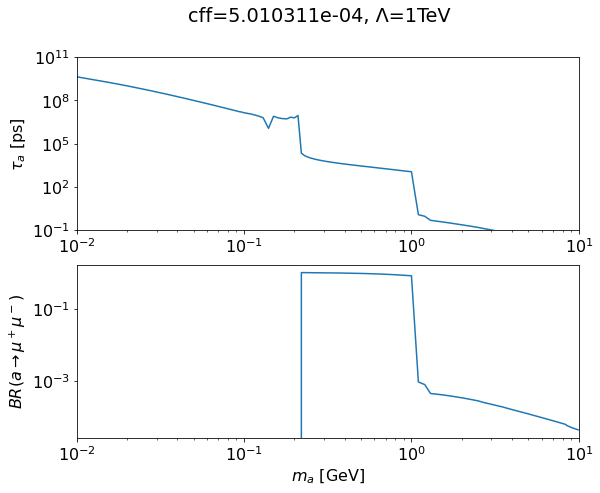

In [98]:
fig, ax = plt.subplots(2,figsize=(9, 7))
plt.suptitle("cff=5.010311e-04, \u039B=1TeV")
#plt.xlim(10**-2,10**1)
# plt.ylim(10**-2,10**8)

ax[0].plot(maList,ctauaList)
ax[0].set_ylabel('$\\tau_a$ [ps]')
ax[0].set_xlim(10**-2,10)
ax[0].set_ylim(10**-1,10**11)

ax[1].plot(maList,brList)
ax[1].set_ylabel('$BR(a \\rightarrow \\mu^+ \\mu^-)$')
ax[1].set_xlabel('$m_a$ [GeV]')
ax[1].set_xlim(10**-2,10)


ax[0].set_xscale('log')
ax[0].set_yscale('log')

ax[1].set_xscale('log')
ax[1].set_yscale('log')


plt.savefig('plots/LHCb_cff-fixed_BRandTau.png', dpi=300, bbox_inches='tight')

<ipython-input-17-994b222f9bd8>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-17-994b222f9bd8>:76: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


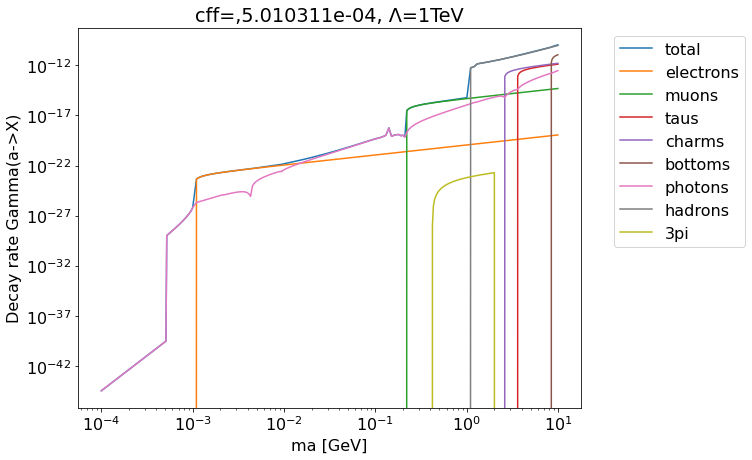

In [47]:
brsALP(5.010311e-04,-5.010311e-04,-5.010311e-04,5.010311e-04,-5.010311e-04,0,0,0,"cff=,5.010311e-04, \u039B=1TeV",1000,br=False,lower=10**-20)

In [78]:
brALPtoOneFinalState(0.5,1,5.010311e-04,-5.010311e-04,-5.010311e-04,5.010311e-04,-5.010311e-04,0,0,0,4*np.pi*10**3)[0]

<ipython-input-17-994b222f9bd8>:50: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:12: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-18-f936f951c6e4>:25: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


0.9419592557580478